# Homework 9

## Problem 1: The distance minimizing property orthogonal projections

In this problem, we will investigate one of the special properties of orthogonal projections. Let $V$ be a subspace of $\mathbb{R}^n$, and let $P_o$ be the orthogonal projection onto $V$. Then for any $x\in \mathbb{R}$ we have that

$$
\|P_ox - x\|_2 = \min_{v \in V} \|v-x\|_2
$$

In particular, if $P$ is any other projection onto $V$, then $\|P_ox - x\|_2 \leq \|Px - x\|_2$. In words, the orthogonal projection finds the _closest point to $x$ in $V$_.

### Part A
Let $k=5, n= 10$. Define a $k\times n$ random matrix $A$.

### Part B
Find the orthogonal projection $P_o$ onto the column space of $A$. Verify that this is a projection by checking that $P_o^2 = P_o$.

### Part C
Find three other (different from $P_o$, and therefore oblique) projections $P_1, P_2, P_3$ onto the column space of $A$. Verify that each is a projection by checking that $P_i^2 = P_i$ for $i=1,2,3$.

### Part D
Define 5 testing vectors $x_1,x_2,\dots,x_5\in \mathbb{R}^n$. For each $i=1,2,\dots,5$, verify that $\|P_ox_i - x_i\|_2$ is smaller than $\|P_1x_i - x_i\|_2, \|P_2x_i - x_i\|_2$ and $\|P_3x_i - x_i\|_2$. 


## Problem 2: Classifying $\sin$ and $\exp$ functions using projections

Our goal in this problem will be build a classifier, classifying whether any given input vector is a noisy $\sin$ vector, a noisy $\exp$ vector or a random vector. Here, a noisy $\sin$ vector is a vector $x = (x_1,\dots, x_d)$ where $x_i = \sin(2\pi i/d) + \epsilon_i$ and $\epsilon_i$ is random noise. Similarly, a noise $\exp$ vector is a vector $x = (x_1,\dots, x_d)$ where $x_i = \exp(-i/(2\pi)) + \epsilon_i$ and again $\epsilon_i$ is noise. A random vector is a vector $x = (x_1,\dots, x_d)$ where $x_i = \epsilon_i$, i.e. each component is just noise. Below we generate twenty vectors of each type, called `sin_vecs`, `exp_vecs`, and `rand_vecs`, which we will use to test your classifier. 

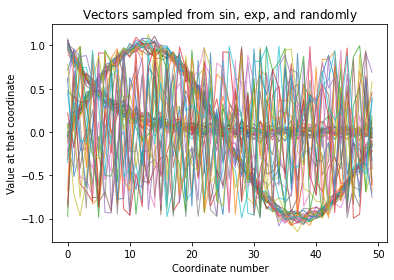

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

d = 50
n = 20
eps = 0.05

xs = np.arange(d)
sin_vecs = (
    np.array([np.sin(2 * math.pi * xs / d) for _ in range(n)]).T
    + np.random.randn(d, n) * eps
)
exp_vecs = (
    np.array([np.exp(-xs / (2 * math.pi)) for _ in range(n)]).T
    + np.random.randn(d, n) * eps
)
rand_vecs = np.array([np.random.rand(d) * 2 - 1 for _ in range(n)]).T

X = np.hstack((sin_vecs, exp_vecs, rand_vecs))

for j in range(X.shape[1]):
    plt.plot(X[:, j], linewidth=1, alpha=0.7)
plt.title("Vectors sampled from $\sin$, $\exp$, and randomly")
plt.xlabel("Coordinate number")
plt.ylabel("Value at that coordinate")
plt.show()

### Part A
Write a function `proj_coef(v,b)` that will calculate the coefficient portion of projecting one vector onto the space spanned by another single vector. In other words, if we're trying to project $v$ onto a space spanned by $b$, calculate $\dfrac{v^Tb}{b^Tb}$.

### Part B
Below, we define two vectors: a "pure $\sin$" vector, and a "pure $\exp$" vector. Here, a pure $\sin$ vector is the vector whose $i$th coordinate is $\sin(2\pi i/d)$, and a pure $\exp$ vector is a the vector whose $i$th coordinate is $\exp(-i/(2\pi))$. That is, they're the same as the noisy vectors we made above, but without the noise.

In [3]:
pure_sin = np.array([2 * math.pi * i / d for i in range(d)])
pure_exp = np.array([np.exp(-i/ (2 * math.pi)) for i in range(d)])

Find the coefficient portion of projecting one each of the noisy $\sin$, noisy $\exp$ and random vectors defined before part A onto the pure $\sin$ and pure $\exp$ vectors (i.e. you should have $6$ numbers total). 

### Part C
Using your insights from Part B, fill in the following function for a classifier which classifies whether a vector is a noisy $\sin$ vector, a noise $\exp$ vector or a random vector. (Hint: compute the coefficient from projection onto the pure sin and pure exp vectors, and use some type of thresholding). 

In [ ]:
def classifier(v):
    """
    v: input vector, represented as one-dimensional ndarray
    output: 0 for sin, 1 for exp, 2 for random
    """

    ### YOUR CODE GOES HERE ###

The code below will test the accuracy of your classifier on the 60 vectors we generated at the beginning. Use this to modify your classifier function as needed; you should be able to get $80\% + $ accuracy.

In [ ]:
sin_acc = 0
for v in sin_vecs.T:
    c = classifier(v)
    if c == 0:
        sin_acc += 1
print("sin accuracy: {}%".format(sin_acc / sin_vecs.shape[1] * 100))

exp_acc = 0
for v in exp_vecs.T:
    c = classifier(v)
    if c == 1:
        exp_acc += 1
print("exp accuracy: {}%".format(exp_acc / exp_vecs.shape[1] * 100))

rnd_acc = 0
for v in rand_vecs.T:
    c = classifier(v)
    if c == 2:
        rnd_acc += 1
print("rand accuracy: {}%".format(rnd_acc / rand_vecs.shape[1] * 100))